## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [3]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

--2025-04-07 17:14:29--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 3.5.212.219, 3.5.208.8, 52.219.160.91, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|3.5.212.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  8.25MB/s    in 3.3s    

2025-04-07 17:14:33 (8.25 MB/s) - ‘data.zip’ saved [28437489/28437489]



In [4]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = '/content/data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)

In [5]:
img=cv2.imread('/content/data/dataset/div/%_1_1.png')
cv2_imshow(img)

In [6]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,add
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,sub
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,div
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5


In [7]:
imagesData = []
imagesLabel = []
data_dir = '/content/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  7600
Labels: ['3', 'sub', 'div', '5', '7', 'add', '2', '0', 'mul', '4', '6', '9', '1', '8']


In [8]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div']
image_count={}
for i in folders:
  folder_path = '/content/data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "/content/data/dataset/0": 595
Number of images in the folder "/content/data/dataset/1": 562
Number of images in the folder "/content/data/dataset/2": 433
Number of images in the folder "/content/data/dataset/3": 541
Number of images in the folder "/content/data/dataset/4": 526
Number of images in the folder "/content/data/dataset/5": 433
Number of images in the folder "/content/data/dataset/6": 581
Number of images in the folder "/content/data/dataset/7": 533
Number of images in the folder "/content/data/dataset/8": 554
Number of images in the folder "/content/data/dataset/9": 546
Number of images in the folder "/content/data/dataset/add": 596
Number of images in the folder "/content/data/dataset/sub": 655
Number of images in the folder "/content/data/dataset/mul": 577
Number of images in the folder "/content/data/dataset/div": 468


In [9]:
print(sum(list(image_count.values())))

7600


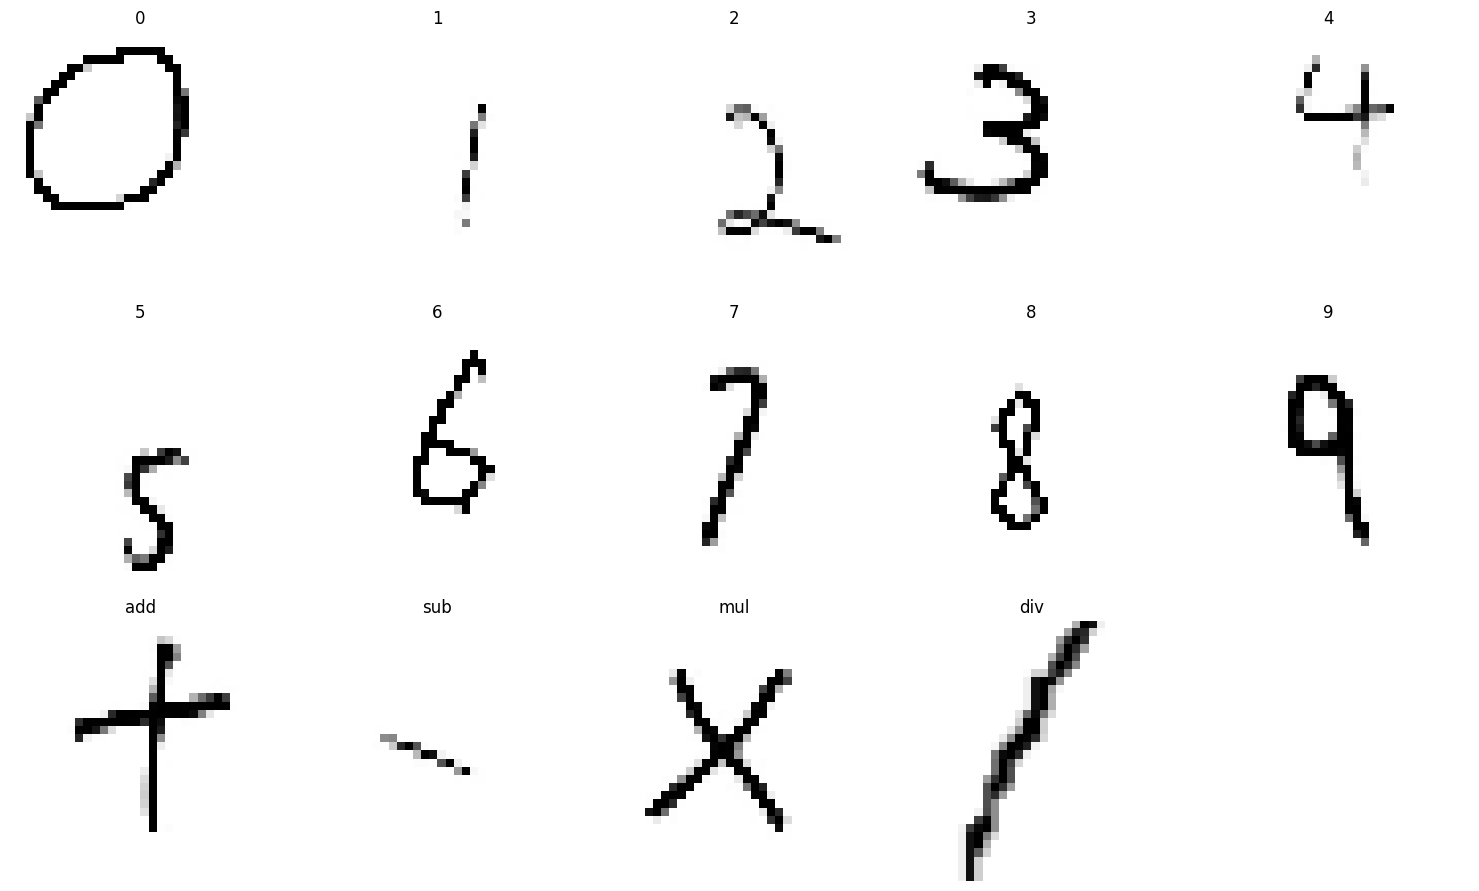

In [10]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

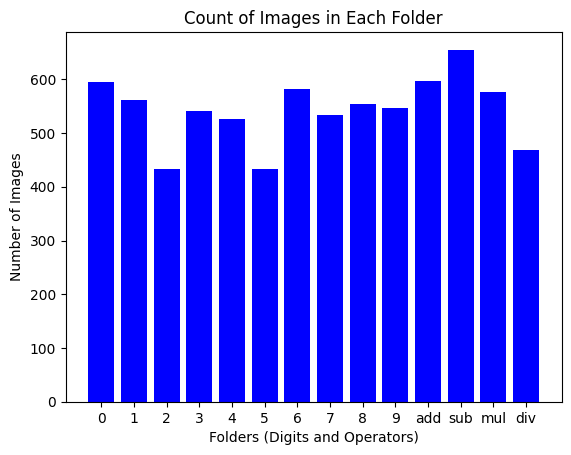

In [11]:
plt.bar(image_count.keys(), image_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

7600
3


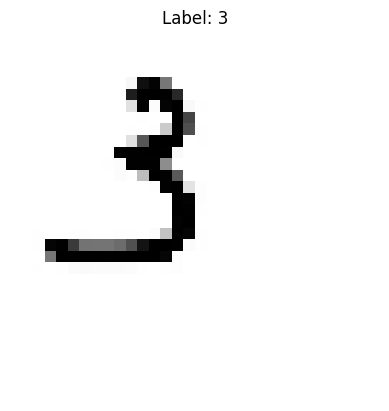

In [15]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [ ]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: np.str_('0'), 1: np.str_('1'), 2: np.str_('2'), 3: np.str_('3'), 4: np.str_('4'), 5: np.str_('5'), 6: np.str_('6'), 7: np.str_('7'), 8: np.str_('8'), 9: np.str_('9'), 10: np.str_('add'), 11: np.str_('div'), 12: np.str_('mul'), 13: np.str_('sub')}


In [ ]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [ ]:
X.shape

(7600, 32, 32)

In [ ]:
X = np.expand_dims(X, axis=-1)
X.shape

(7600, 32, 32, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 6080
Testing set size: 1520


In [ ]:
len(np.unique(y))

14

## CNN Model

In [ ]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64,(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,198 (426.55 KB)

 Trainable params: 109,198 (426.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - acc: 0.1691 - loss: 2.4240 - val_acc: 0.7447 - val_loss: 0.8411
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - acc: 0.7144 - loss: 0.9120 - val_acc: 0.8487 - val_loss: 0.5270
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - acc: 0.8115 - loss: 0.5996 - val_acc: 0.8967 - val_loss: 0.3688
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - acc: 0.8599 - loss: 0.4446 - val_acc: 0.9046 - val_loss: 0.3007
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - acc: 0.8785 - loss: 0.3730 - val_acc: 0.9434 - val_loss: 0.2034
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - acc: 0.9004 - loss: 0.3104 - val_acc: 0.9408 - val_loss: 0.2053
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 22s 75ms/step - acc: 0.9152 - loss: 0.2743 - val_acc: 0.9434 - val_loss: 0.1789
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - acc: 0.9238 - loss: 0.2406 - val_acc: 0.9375 - val_loss: 0.1974
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 

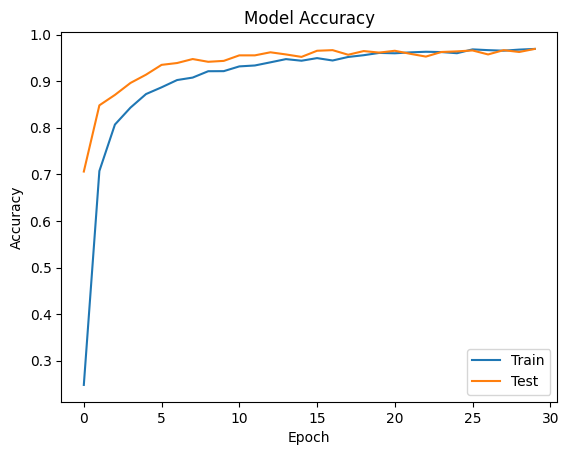

In [ ]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9681 - loss: 0.1193
Test accuracy of the loaded model: 96.91%


In [ ]:
loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - acc: 0.9927 - loss: 0.0266
Accuracy of the model: 99.28%


In [ ]:
print(y.shape)

(7600,)


In [ ]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step


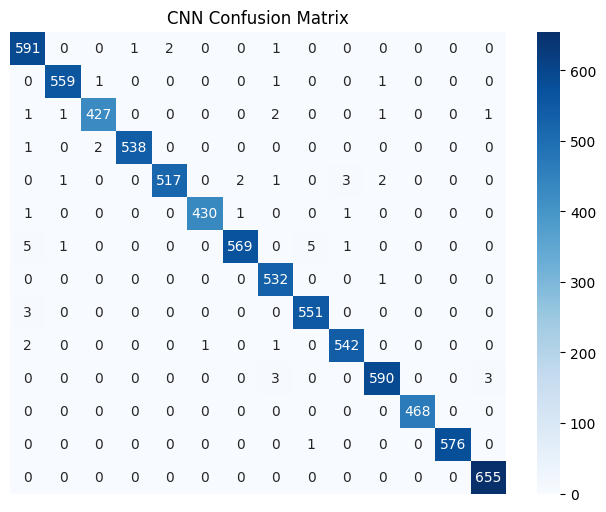

In [ ]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [ ]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[591   0   0   1   2   0   0   1   0   0   0   0   0   0]
 [  0 559   1   0   0   0   0   1   0   0   1   0   0   0]
 [  1   1 427   0   0   0   0   2   0   0   1   0   0   1]
 [  1   0   2 538   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0 517   0   2   1   0   3   2   0   0   0]
 [  1   0   0   0   0 430   1   0   0   1   0   0   0   0]
 [  5   1   0   0   0   0 569   0   5   1   0   0   0   0]
 [  0   0   0   0   0   0   0 532   0   0   1   0   0   0]
 [  3   0   0   0   0   0   0   0 551   0   0   0   0   0]
 [  2   0   0   0   0   1   0   1   0 542   0   0   0   0]
 [  0   0   0   0   0   0   0   3   0   0 590   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0 468   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0 576   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 655]]


In [ ]:
cnn_model.save('cnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


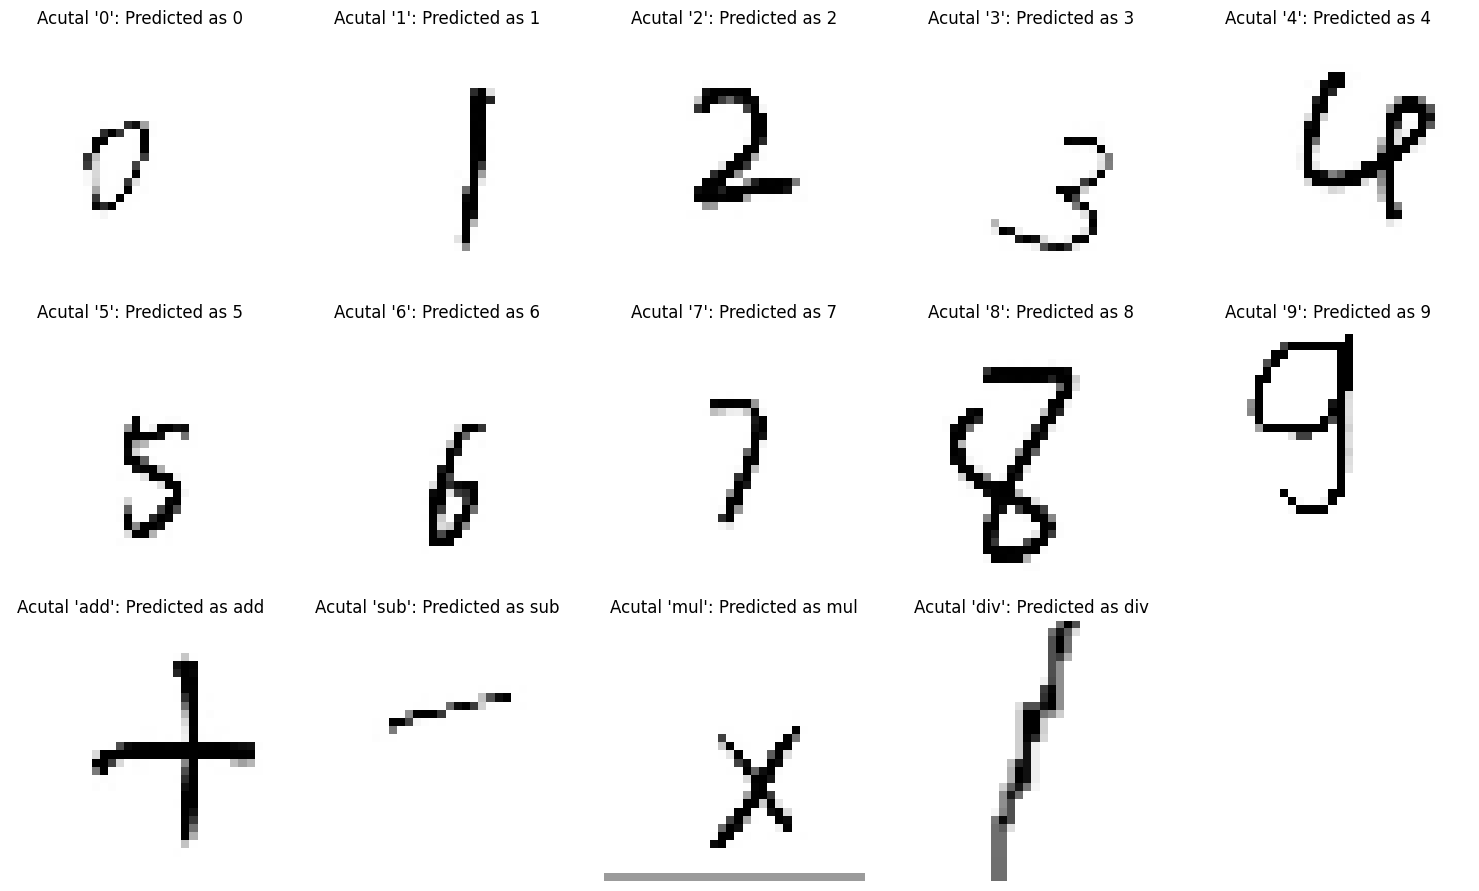

In [ ]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '/', 12: '*', 13: '-'}

model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    # Check if rois is empty before predicting to avoid the error.
    if rois.size == 0:
        print("No Regions of Interest (ROIs) detected in the image.")
        return

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')

    # Check if the equation can be evaluated.
    try:
      print(f'Result: {eval(equation)}')
    except:
      print("Unable to evaluate the equation")

In [ ]:
predict('test2.png')

No Regions of Interest (ROIs) detected in the image.


## RNN model

In [ ]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(14, activation='softmax'))

rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32, 64)              │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,846 (128.30 KB)

 Trainable params: 32,846 (128.30 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - acc: 0.0748 - loss: 2.6495 - val_acc: 0.0855 - val_loss: 2.6232
Epoch 2/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - acc: 0.1090 - loss: 2.5955 - val_acc: 0.1691 - val_loss: 2.3998
Epoch 3/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - acc: 0.1810 - loss: 2.3755 - val_acc: 0.2296 - val_loss: 2.1053
Epoch 4/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - acc: 0.2747 - loss: 2.0882 - val_acc: 0.3592 - val_loss: 1.8221
Epoch 5/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - acc: 0.3469 - loss: 1.8231 - val_acc: 0.4197 - val_loss: 1.5878
Epoch 6/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - acc: 0.3666 - loss: 1.7076 - val_acc: 0.4428 - val_loss: 1.5566
Epoch 7/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - acc: 0.4340 - loss: 1.5817 - val_acc: 0.4967 - val_loss: 1.3869
Epoch 8/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - acc: 0.4554 - loss: 1.4906 - val_acc: 0.5697 - val_loss: 1.2003
Epoch 9/30
190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms

In [ ]:
rnn_model.save('rnn_model.h5')

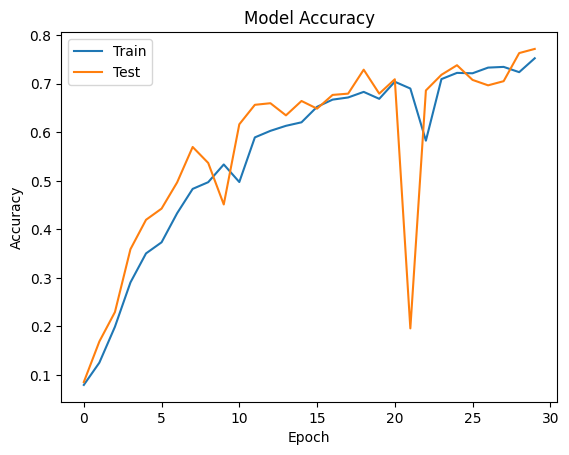

In [ ]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


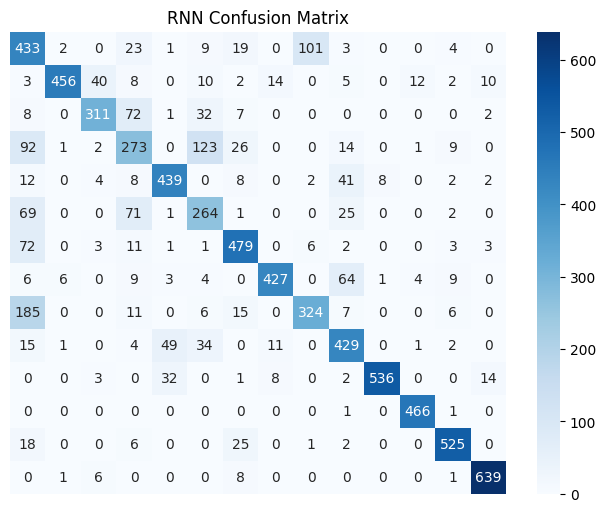

In [ ]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

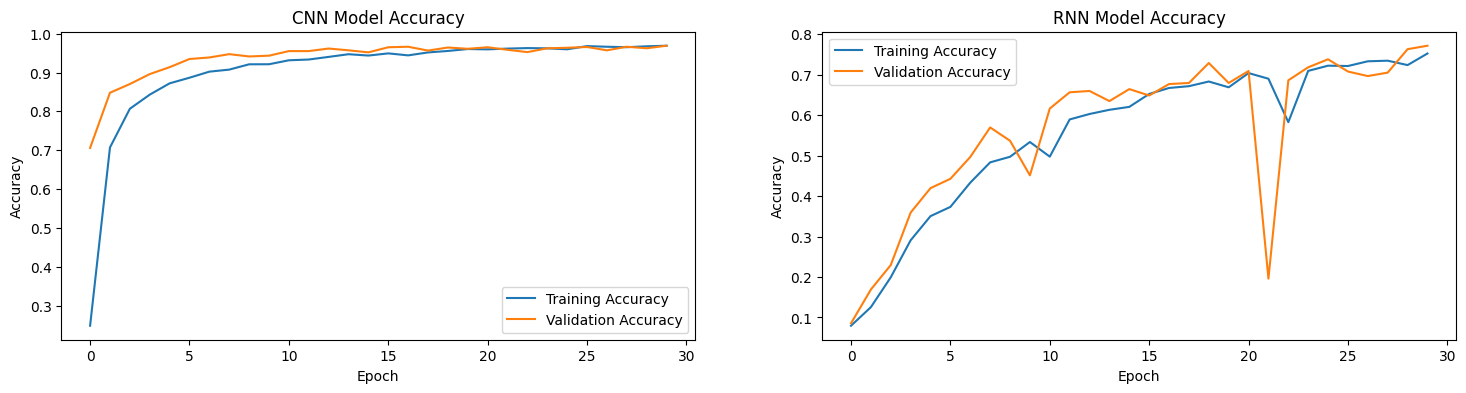

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()


In [ ]:

import sympy as sp

def solve_equation(predicted_labels):
    equation = "".join(predicted_labels)  # Convert list of recognized characters into a string
    try:
        result = sp.sympify(equation)  # Evaluate the equation safely
        print(f"Recognized Equation: {equation} = {result}")
    except Exception as e:
        print(f"Error in solving equation: {e}")

# Example usage (Replace this with the actual predictions from the model)
predicted_labels = ['1', '2', '+', '3']  # Example recognized equation "12+3"
solve_equation(predicted_labels)


Recognized Equation: 12+3 = 15


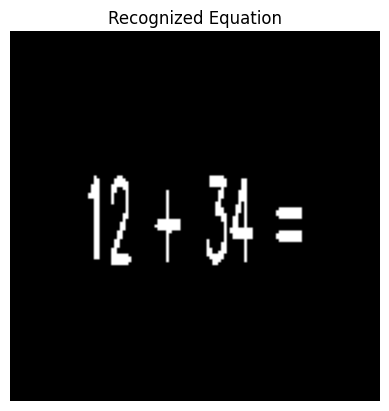

📝 Recognized Equation: 12 + 34
✅ Solution: 12 + 34 = 46


In [ ]:
import cv2
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 🔹 Step 1: Generate & Save a Sample Image with an Equation
def create_equation_image():
    image = np.ones((100, 300), dtype=np.uint8) * 255  # White background
    text = "12 + 34 ="  # Sample equation
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2
    color = (0,)  # Black text
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_x = (image.shape[1] - text_size[0]) // 2
    text_y = (image.shape[0] + text_size[1]) // 2
    cv2.putText(image, text, (text_x, text_y), font, font_scale, color, thickness)

    image_path = "/content/sample_equation.jpg"
    cv2.imwrite(image_path, image)  # Save the image
    return image_path

# 🔹 Step 2: Function to Process & Solve the Equation
def process_and_solve(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("❌ Error: Could not load image!")
        return

    # Preprocess the image (resize & binarization)
    image = cv2.resize(image, (128, 128))
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

    # Display the input image
    plt.imshow(image, cmap='gray')
    plt.title("Recognized Equation")
    plt.axis('off')
    plt.show()

    # 🔹 Simulating OCR (Replace this with actual model prediction)
    recognized_equation = "12 + 34"  # Hardcoded for now (Replace with OCR output)
    print(f"📝 Recognized Equation: {recognized_equation}")

    try:
        result = sp.sympify(recognized_equation)  # Solve the equation
        print(f"✅ Solution: {recognized_equation} = {result}")
    except Exception as e:
        print(f"❌ Error in solving equation: {e}")

# 🔹 Step 3: Run the Program
image_path = create_equation_image()  # Create an image with an equation
process_and_solve(image_path)  # Process and solve the equation


## Conclusion

In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 97.57%, while the RNN-based method achieved a respectable accuracy of 76.32%.

The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.